In [1]:
import numpy as np
import math as mat
from matplotlib import pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [2]:
ms = 50            # the weight of the rocket shell
g = 9.81           # m/s^2
den = 1.091    # kg/m^3 the average air density
r = 0.5             # m
ve = 325         # m/s the exhaust speed
CD = 0.15       # the drag coefficient
mp0 = 100     # kg at t = 0. the initial weight of the rocket propellantif 
v0 = 0             # initial velocity
h0 = 0             # initial height




In [3]:
def mmp(t): 
    if t < 5:
        return 20
    else:
        return 0
    
dt = 0.1 
T = 100.0                                             #  length of the time interval 
dt = 0.1                                                # time-step size
N = int(T/dt) + 1                                 # number of time steps 
t = np.linspace(0.0, T, num = N)      # time discretization
A = mat.pi*r**2                                  # the maximum cross sectional area

mp = np.zeros(N)
mp[0] = mp0

for n in range(N):
    if n < 5/dt:
        mp[n] = mp0 - mmp(n*dt)*n*dt
    else:
        mp[n] = 0.0

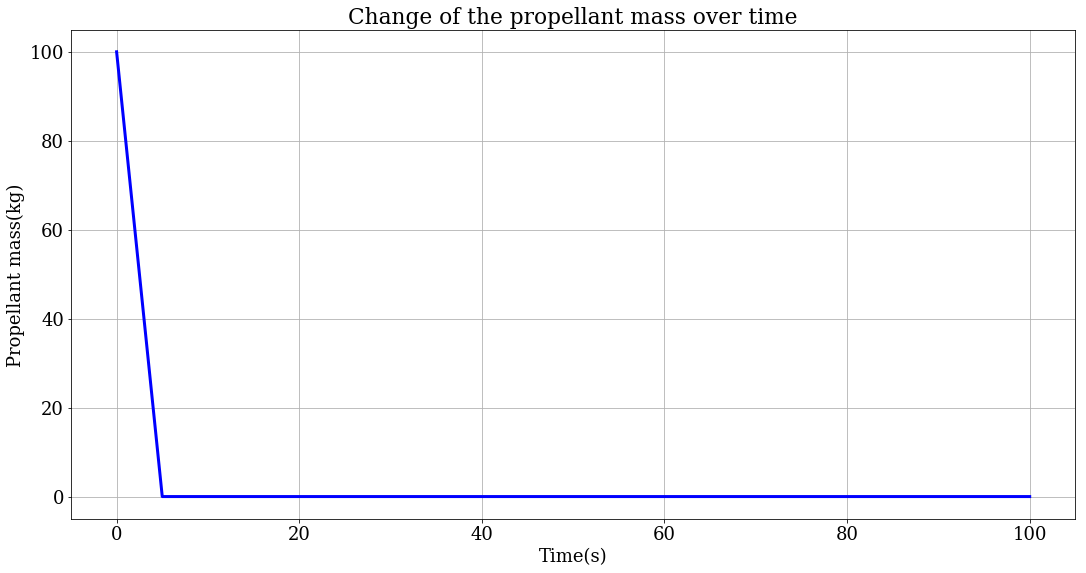

In [4]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 18
plt.figure(figsize=(18, 9))
plt.plot(t, mp, color='b', linestyle='-', linewidth=3)
plt.title('Change of the propellant mass over time')
plt.xlabel('Time(s)')
plt.ylabel('Propellant mass(kg)')
plt.grid()

In [8]:
def f(u):
    v = u[0]
    h = u[1]
    return np.array([-g+1/(ms + mp[n])*ve*mmp(n*dt)-0.5*1/(ms+mp[n])*den*v*np.abs(v)*A*CD])
    
   
    
    

In [9]:
def euler_step(u, f, dt): 
 

 return  u + dt * f(u) 



In [10]:
T = 100.0                                      # length of the time interval 
dt = 0.1                                         # time-step size
N = int(T/dt) + 1                           # number of time steps 
t = np.linspace(0.0, T, num = N) # time discretization

# Create arry to store the solution st each time step
u = np.empty((N, 2))
# set the initial condtions.
u[0] = np.array([v0, h0])


# time integration with Euler's method
for n in range(N-1):
    u[n + 1] = euler_step(u[n], f, dt)
    

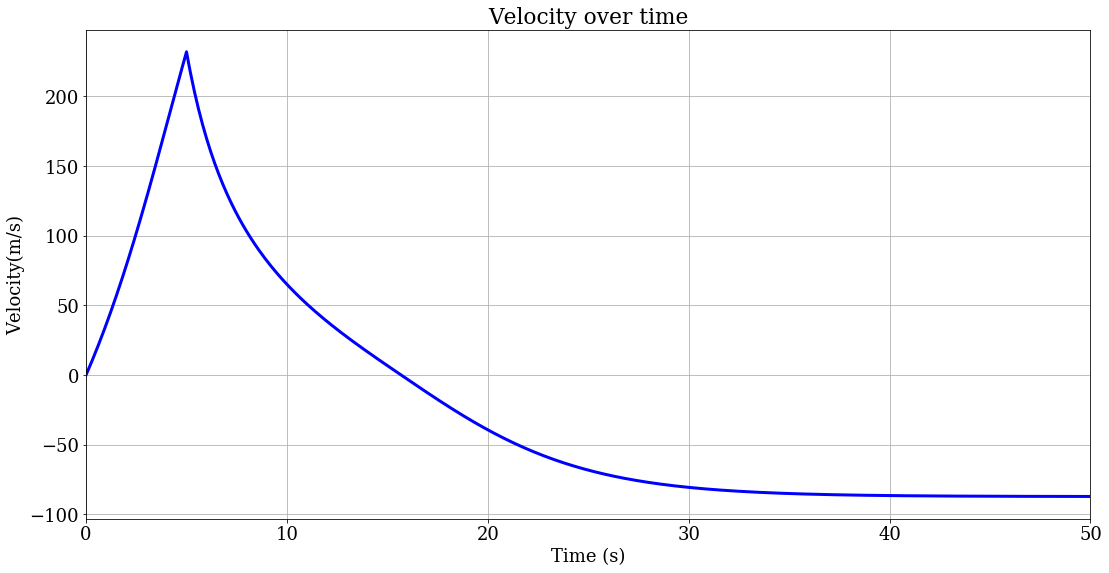

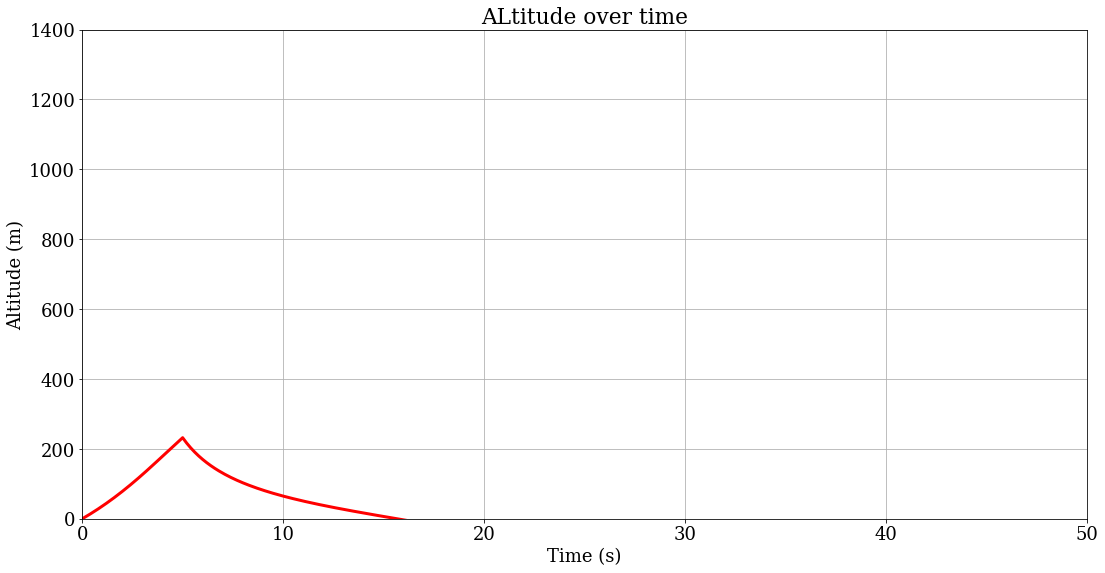

In [11]:
v = u[:,0]
h = u[:,1]

plt.figure(figsize = (18, 9))
plt.plot(t, v, color = 'b', linestyle = '-', linewidth = 3)
plt.title('Velocity over time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity(m/s)')
plt.xlim(0, 50)
plt.grid()

plt.figure(figsize = (18, 9))
plt.plot(t, v, color = 'r', linestyle = '-', linewidth = 3)
plt.title('ALtitude over time')
plt.xlabel('Time (s)')
plt.ylabel('Altitude (m)')
plt.xlim(0, 50)
plt.ylim(0, 1400)
plt.grid()
